The Zillow challenge is about predicting the prices of real estate in 2017. 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [20]:
prop_data = pd.read_csv("properties_2016.csv")
print prop_data.shape
prop_data.head()

(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [21]:
train_data = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
print train_data.shape
train_data.head()

(90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


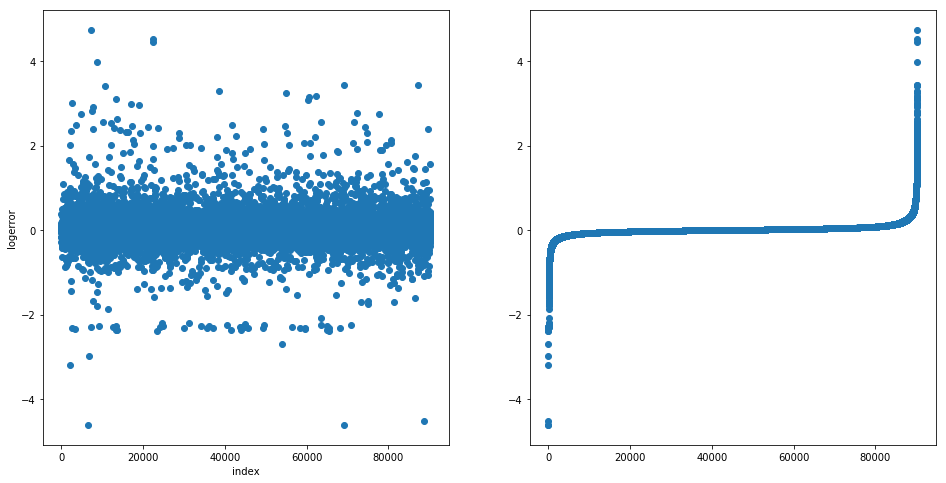

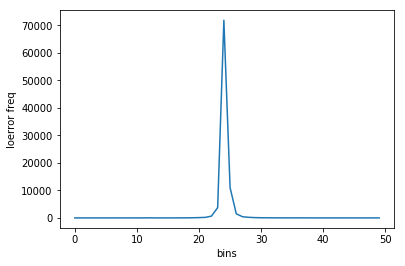

In [22]:
logerror = train_data["logerror"]
hist, bins = np.histogram(logerror, bins=50)
center = (bins[:-1] + bins[1:]) / 2
width = 0.7 * (bins[1]-bins[0])
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.xlabel("index")
plt.ylabel("logerror")
plt.scatter(range(train_data.shape[0]), logerror)
plt.subplot(122)
plt.scatter(range(train_data.shape[0]), np.sort(logerror))
plt.show()
# plt.subplot(133)
plt.xlabel("bins")
plt.ylabel("loerror freq")
plt.plot(hist)
plt.show()


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


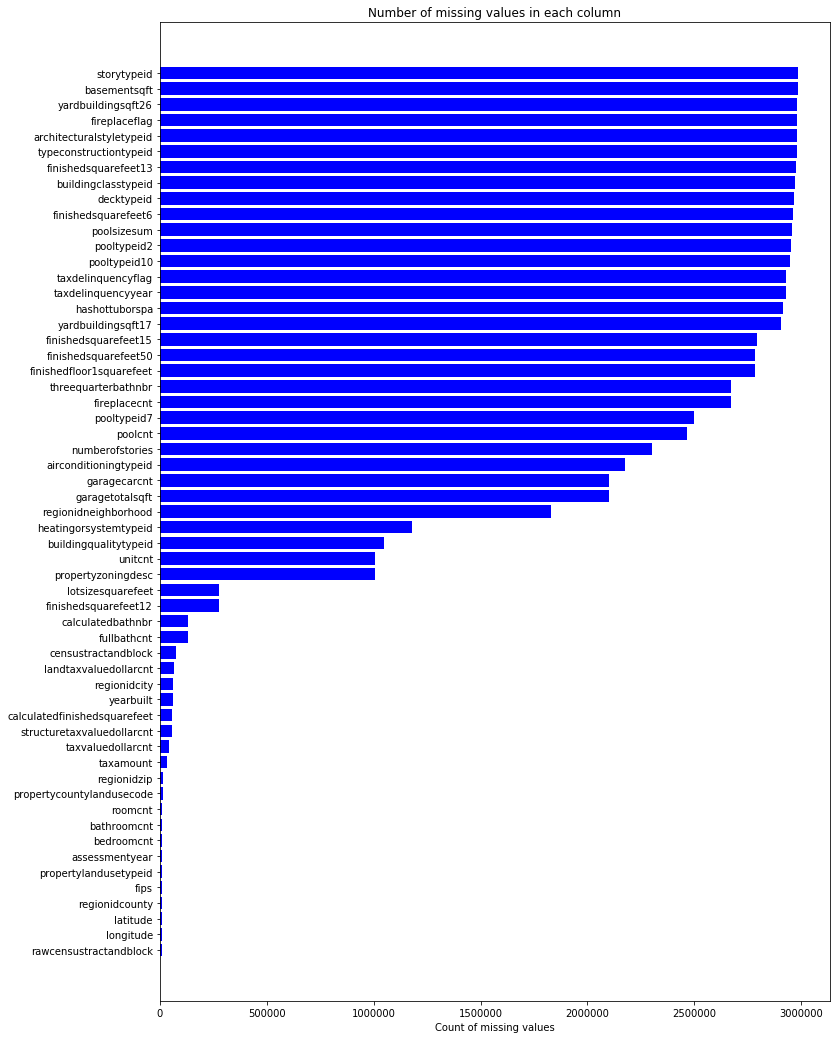

In [23]:
missing_val = prop_data.isnull().sum().reset_index()
missing_val.columns = ['column_name', 'missing_count']
missing_val = missing_val.ix[missing_val['missing_count']>0]
missing_val = missing_val.sort_values(by='missing_count')

ind = np.arange(missing_val.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_val.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_val.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [24]:
missing_val['missing_ratio'] = missing_val["missing_count"]/prop_data.shape[0]
missing_val = missing_val.ix[missing_val["missing_ratio"]>0.995]
missing_val


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,column_name,missing_count,missing_ratio
6,buildingclasstypeid,2972588,0.995769
13,finishedsquarefeet13,2977545,0.997430
43,typeconstructiontypeid,2978470,0.997740
2,architecturalstyletypeid,2979156,0.997970
49,fireplaceflag,2980054,0.998270
46,yardbuildingsqft26,2982570,0.999113
3,basementsqft,2983589,0.999455
41,storytypeid,2983593,0.999456


In [25]:
prop_data.drop(missing_val.column_name.values, axis=1, inplace=True)

In [26]:
missing_val_rows = prop_data.isnull().sum(axis=1).reset_index()
missing_val_rows.columns = ["row_index", "null_count"]
missing_val_rows["missing_ratio"] = missing_val_rows["null_count"]/prop_data.shape[1]
missing_val_rows["missing_ratio"]

0          0.66
1          0.64
2          0.54
3          0.48
4          0.50
5          0.48
6          0.60
7          0.52
8          0.64
9          0.50
10         0.50
11         0.66
12         0.64
13         0.64
14         0.64
15         0.64
16         0.62
17         0.52
18         0.52
19         0.42
20         0.48
21         0.50
22         0.46
23         0.46
24         0.48
25         0.62
26         0.46
27         0.48
28         0.40
29         0.42
           ... 
2985187    0.98
2985188    0.98
2985189    0.98
2985190    0.98
2985191    0.98
2985192    0.98
2985193    0.98
2985194    0.98
2985195    0.98
2985196    0.98
2985197    0.98
2985198    0.98
2985199    0.98
2985200    0.98
2985201    0.98
2985202    0.98
2985203    0.98
2985204    0.98
2985205    0.98
2985206    0.98
2985207    0.98
2985208    0.98
2985209    0.98
2985210    0.98
2985211    0.98
2985212    0.98
2985213    0.98
2985214    0.98
2985215    0.98
2985216    0.98
Name: missing_ratio, Len

In [27]:
rows_to_delete = missing_val_rows.ix[missing_val_rows["missing_ratio"]>0.95]
rows_to_delete


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,row_index,null_count,missing_ratio
2973780,2973780,49,0.98
2973781,2973781,49,0.98
2973782,2973782,49,0.98
2973783,2973783,49,0.98
2973784,2973784,49,0.98
2973785,2973785,49,0.98
2973786,2973786,49,0.98
2973787,2973787,49,0.98
2973788,2973788,49,0.98
2973789,2973789,49,0.98


In [28]:
prop_data.drop(prop_data.index[rows_to_delete["row_index"]], inplace=True)
prop_data.shape

(2973780, 50)

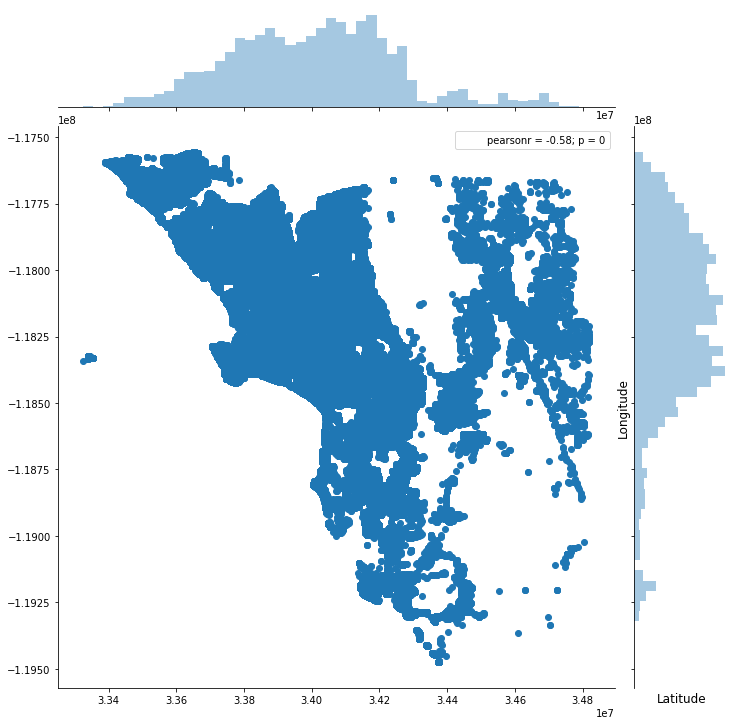

In [29]:
plt.figure(figsize=(12,12))
sb.jointplot(x=prop_data.latitude.values, y=prop_data.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [30]:
train_data = pd.merge(train_data, prop_data, on='parcelid', how='left')
train_data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,NaN,NaN,...,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,3.5,NaN,NaN,...,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,NaN,NaN,...,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,NaN,NaN,...,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2.5,NaN,NaN,...,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [31]:
train_data.to_csv("/home/jay/Documents/MS/CSE519-2017-111491357/HW2/train_data_merge.csv")

In [32]:
missing_val = train_data.isnull().sum().reset_index()
missing_val.columns = ['column_name', 'missing_count']
missing_val = missing_val.loc[missing_val['missing_count']>0]
missing_val = missing_val.sort_values(by='missing_count')
missing_val['missing_ratio'] = missing_val["missing_count"]/train_data.shape[0]
missing_val = missing_val.loc[missing_val["missing_ratio"]>0.80]
missing_val

,column_name,missing_count,missing_ratio
25,poolcnt,72374,0.801706
29,pooltypeid7,73578,0.815043
39,threequarterbathnbr,78266,0.866973
16,fireplacecnt,80668,0.893581
13,finishedsquarefeet50,83419,0.924054
9,finishedfloor1squarefeet,83419,0.924054
12,finishedsquarefeet15,86711,0.960521
41,yardbuildingsqft17,87629,0.970690
20,hashottuborspa,87910,0.973802
50,taxdelinquencyyear,88492,0.980249


In [33]:
train_data.drop(missing_val.column_name.values, axis=1, inplace=True)

In [34]:
train_data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,...,0.0,1.0,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,3.5,2263.0,2263.0,...,0.0,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,...,0.0,1.0,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,839.0,839.0,...,0.0,1.0,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2.5,2283.0,2283.0,...,8.0,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13


In [16]:
missing_val_rows = train_data.isnull().sum(axis=1).reset_index()
missing_val_rows.columns = ["row_index", "null_count"]
missing_val_rows["missing_ratio"] = missing_val_rows["null_count"]/train_data.shape[1]
missing_val_rows["missing_ratio"]

0        0.083333
1        0.222222
2        0.083333
3        0.083333
4        0.166667
5        0.111111
6        0.138889
7        0.194444
8        0.222222
9        0.194444
10       0.111111
11       0.083333
12       0.138889
13       0.250000
14       0.166667
15       0.111111
16       0.166667
17       0.111111
18       0.166667
19       0.083333
20       0.111111
21       0.138889
22       0.166667
23       0.111111
24       0.194444
25       0.111111
26       0.111111
27       0.166667
28       0.083333
29       0.111111
           ...   
90245    0.111111
90246    0.111111
90247    0.111111
90248    0.111111
90249    0.138889
90250    0.166667
90251    0.138889
90252    0.111111
90253    0.111111
90254    0.111111
90255    0.111111
90256    0.138889
90257    0.111111
90258    0.083333
90259    0.083333
90260    0.138889
90261    0.111111
90262    0.083333
90263    0.083333
90264    0.111111
90265    0.111111
90266    0.194444
90267    0.166667
90268    0.111111
90269    0

In [17]:
duplicate_or_not_useful_cols = pd.Series(['calculatedbathnbr', 'assessmentyear', 'fullbathcnt', 'regionidneighborhood', 'propertyzoningdesc', 'finishedsquarefeet12', 'censustractandblock'])
train_data.drop(duplicate_or_not_useful_cols, axis=1, inplace=True)

In [18]:
train_data.to_csv("/home/jay/Documents/MS/CSE519-2017-111491357/HW2/train_data_mod.csv")
# train_data_clean_1 = train_data
print train_data

       parcelid  logerror transactiondate  airconditioningtypeid  bathroomcnt  \
0      11016594    0.0276      2016-01-01                    1.0          2.0   
1      14366692   -0.1684      2016-01-01                    NaN          3.5   
2      12098116   -0.0040      2016-01-01                    1.0          3.0   
3      12643413    0.0218      2016-01-02                    1.0          2.0   
4      14432541   -0.0050      2016-01-02                    NaN          2.5   
5      11509835   -0.2705      2016-01-02                    1.0          4.0   
6      12286022    0.0440      2016-01-02                    NaN          1.0   
7      17177301    0.1638      2016-01-02                    NaN          2.5   
8      14739064   -0.0030      2016-01-02                    NaN          1.0   
9      14677559    0.0843      2016-01-03                    NaN          2.0   
10     10854446    0.3825      2016-01-03                    NaN          2.0   
11     11672170   -0.0161   

In [19]:
dtype_df = train_data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
# dtype_df.groupby("Column Type").aggregate("count").reset_index()


,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,airconditioningtypeid,float64
4,bathroomcnt,float64
5,bedroomcnt,float64
6,buildingqualitytypeid,float64
7,calculatedfinishedsquarefeet,float64
8,fips,float64
9,garagecarcnt,float64


In [20]:
categorical_columns = pd.Series(['HeatingOrSystemTypeID',
'PropertyLandUseTypeID',
'StoreTypeID',
'AirConditioningTypeID',
'ArchitecturalStyleTypeID',
'TypeConstructionTypeID',
'BuildingClassTypeID'])

In [21]:
train_data.columns.values

array(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'garagecarcnt',
       'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'], dtype=object)

In [22]:
for column in train_data:
    print column, "\n",train_data[column].value_counts(dropna=False), "\n\n\n********"

parcelid 
11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
14753974    2
12779635    2
11188497    2
10883535    2
10790468    2
10798910    2
14678446    2
12689560    2
10796614    2
14316410    2
11633771    2
12023571    2
14667297    2
14294516    2
12715657    2
14444102    2
14022812    2
12978851    2
14057417    2
11135845    2
11477350    2
11146377    2
11866315    2
11602482    2
14500952    2
           ..
11240334    1
11320206    1
10739089    1
12123282    1
10741142    1
12031384    1
14130585    1
12027290    1
12862962    1
12756350    1
17197466    1
11046267    1
10910830    1
14202253    1
11038055    1
11104576    1
17265761    1
12858732    1
14604356    1
12068206    1
14210190    1
14736753    1
14599538    1
14601587    1
14613877    1
11199862    1
11726199    1
12096888    1
11181433    1
12438686    1
Name: parcelid, Length: 90150, dtype: int64 


********
logerror 
 0.0030    938
 0.0020    915
 0.0050    911
 0.0010    901
 0.0070   

In [23]:
columns = [
'logerror',
'transactiondate',
'airconditioningtypeid',
'architecturalstyletypeid',
'basementsqft',
'bathroomcnt',
'bedroomcnt',
'buildingqualitytypeid',
'buildingclasstypeid',
'calculatedbathnbr',
'decktypeid',
'threequarterbathnbr',
'finishedfloor1squarefeet',
'calculatedfinishedsquarefeet',
'finishedsquarefeet6',
'finishedsquarefeet12',
'finishedsquarefeet13',
'finishedsquarefeet15',
'finishedsquarefeet50',
'fips',
'fireplacecnt',
'fireplaceflag',
'fullbathcnt',
'garagecarcnt',
'garagetotalsqft',
'hashottuborspa',
'heatingorsystemtypeid',
'latitude',
'longitude',
'lotsizesquarefeet',
'numberofstories',
'parcelid',
'poolcnt',
'poolsizesum',
'pooltypeid10',
'pooltypeid2',
'pooltypeid7',
'propertycountylandusecode',
'propertylandusetypeid',
'propertyzoningdesc',
'rawcensustractandblock',
'censustractandblock',
'regionidcounty',
'regionidcity',
'regionidzip',
'regionidneighborhood',
'roomcnt',
'storytypeid',
'typeconstructiontypeid',
'unitcnt',
'yardbuildingsqft17',
'yardbuildingsqft26',
'yearbuilt',
'taxvaluedollarcnt',
'structuretaxvaluedollarcnt',
'landtaxvaluedollarcnt',
'taxamount',
'assessmentyear',
'taxdelinquencyflag',
'taxdelinquencyyear'
]

for c in columns:
    if c not in train_data.columns.values:
        print c

architecturalstyletypeid
basementsqft
buildingclasstypeid
calculatedbathnbr
decktypeid
threequarterbathnbr
finishedfloor1squarefeet
finishedsquarefeet6
finishedsquarefeet12
finishedsquarefeet13
finishedsquarefeet15
finishedsquarefeet50
fireplacecnt
fireplaceflag
fullbathcnt
hashottuborspa
poolcnt
poolsizesum
pooltypeid10
pooltypeid2
pooltypeid7
propertyzoningdesc
censustractandblock
regionidneighborhood
storytypeid
typeconstructiontypeid
yardbuildingsqft17
yardbuildingsqft26
assessmentyear
taxdelinquencyflag
taxdelinquencyyear


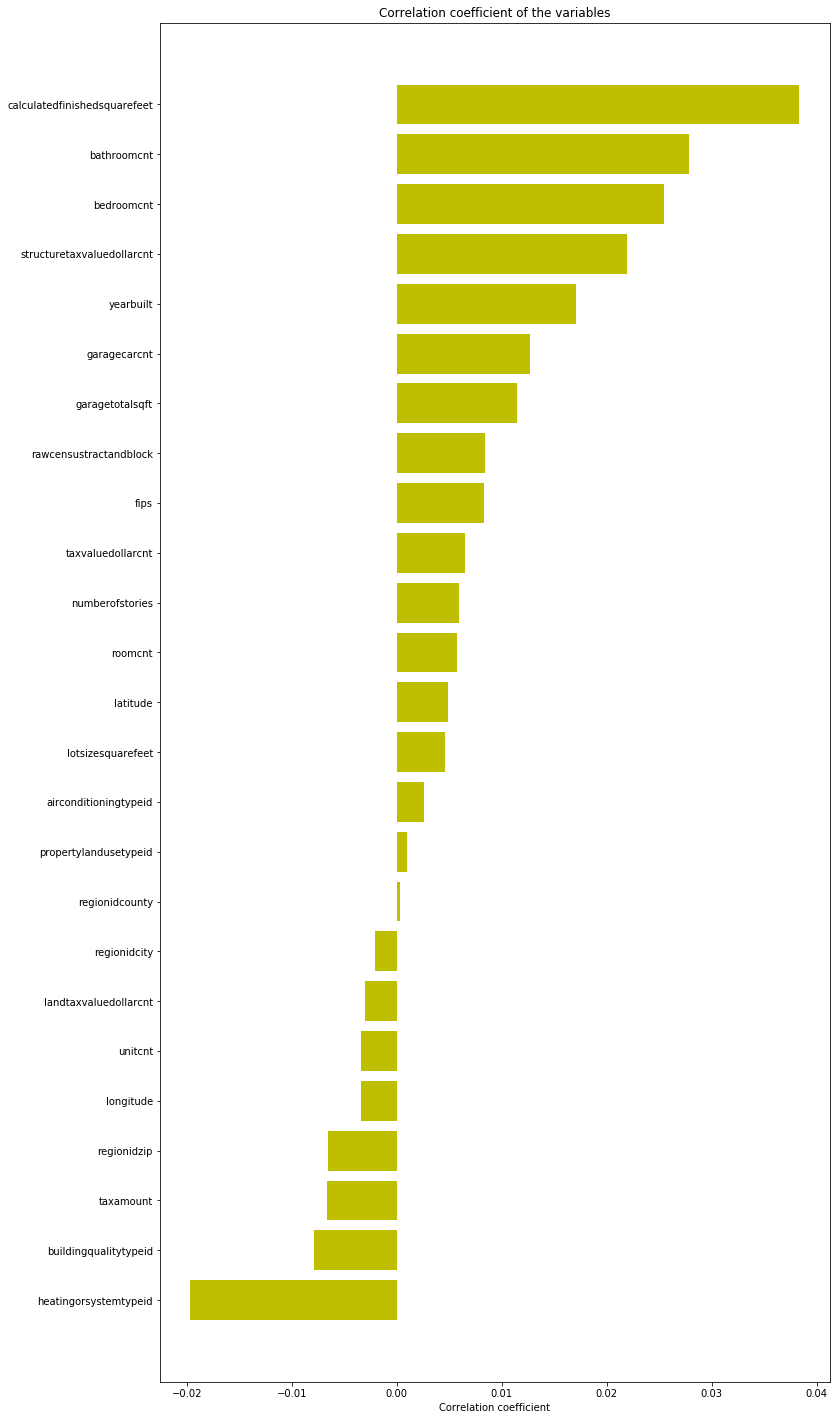

In [24]:
mean_values = train_data.mean(axis=0)
train_data_new = train_data.fillna(mean_values)

# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train_data_new.columns if col not in ['logerror'] if train_data_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_data_new[col].values, train_data_new.logerror.values)[0,1])
corr_data = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_data = corr_data.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(12,25))
rects = ax.barh(ind, np.array(corr_data.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_data.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [25]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

non_float_cols = ["propertycountylandusecode"]
cat_cols = ["airconditioningtypeid", "heatingorsystemtypeid", "propertylandusetypeid"]

train_df = train_data_new.drop(["parcelid", "logerror", "transactiondate"]+non_float_cols+cat_cols, axis=1)
target = train_data_new["logerror"].values

feature_names = train_df.columns.values

print feature_names

X_train, X_test, y_train, y_test = train_test_split( train_df, target, test_size=0.2, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# print y_pred.shape

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: % f"
      % mean_squared_error(y_test, y_pred))

# # # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

print('Variance score: % f' % regr.score( X_test, y_test))

['bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid'
 'calculatedfinishedsquarefeet' 'fips' 'garagecarcnt' 'garagetotalsqft'
 'latitude' 'longitude' 'lotsizesquarefeet' 'rawcensustractandblock'
 'regionidcity' 'regionidcounty' 'regionidzip' 'roomcnt' 'unitcnt'
 'yearbuilt' 'numberofstories' 'structuretaxvaluedollarcnt'
 'taxvaluedollarcnt' 'landtaxvaluedollarcnt' 'taxamount']
('Coefficients: \n', array([ -1.90693517e-03,   1.47512522e-04,   1.93353382e-04,
         1.20465830e-05,   9.50992917e-03,   1.48268486e-03,
        -7.81834747e-06,  -3.20494157e-10,   7.33832592e-09,
         7.88470814e-09,  -9.35028612e-07,  -9.59744591e-09,
         7.85425814e-06,  -4.38569708e-07,   1.28869823e-05,
        -1.50770070e-03,   7.39387281e-05,  -1.40434467e-03,
        -2.34844133e-07,   2.63467644e-07,  -2.38324617e-07,
        -3.04344224e-06]))
Mean squared error:  0.025933
Variance score:  0.005423


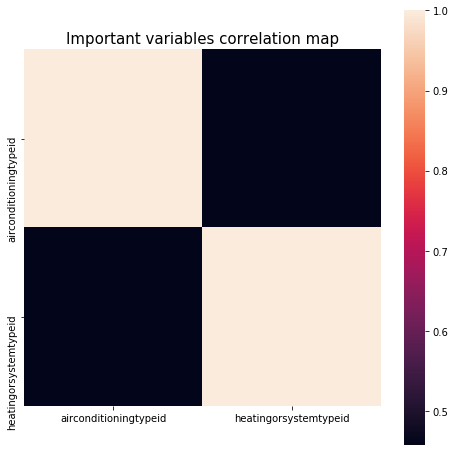

In [26]:
train_data_new = train_data.fillna(-1)

# Now let us look at the correlation coefficient of each of these variables #
cols_to_use = [col for col in train_data_new.columns if col in ['airconditioningtypeid', 'heatingorsystemtypeid']]

# cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_data[cols_to_use]
corrmat = temp_df.corr(method="spearman")
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [27]:
train_data.ix[train_data["airconditioningtypeid"] != train_data["heatingorsystemtypeid"]]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,garagecarcnt,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,1684.0,6037.0,NaN,...,3101.0,96370.0,0.0,1.0,1959.0,NaN,122754.0,360170.0,237416.0,6735.88
1,14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,2263.0,6059.0,2.0,...,1286.0,96962.0,0.0,NaN,2014.0,NaN,346458.0,585529.0,239071.0,10153.02
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,2217.0,6037.0,NaN,...,3101.0,96293.0,0.0,1.0,1940.0,NaN,61994.0,119906.0,57912.0,11484.48
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,839.0,6037.0,NaN,...,3101.0,96222.0,0.0,1.0,1987.0,NaN,171518.0,244880.0,73362.0,3048.74
4,14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2283.0,6059.0,2.0,...,1286.0,96961.0,8.0,NaN,1981.0,2.0,169574.0,434551.0,264977.0,5488.96
5,11509835,-0.2705,2016-01-02,1.0,4.0,4.0,1.0,3067.0,6037.0,NaN,...,3101.0,96109.0,0.0,1.0,1982.0,NaN,880650.0,2447951.0,1567301.0,27126.57
6,12286022,0.0440,2016-01-02,NaN,1.0,2.0,7.0,1297.0,6037.0,NaN,...,3101.0,96091.0,0.0,1.0,1939.0,NaN,64549.0,111521.0,46972.0,2304.97
7,17177301,0.1638,2016-01-02,NaN,2.5,3.0,NaN,1763.0,6111.0,2.0,...,2061.0,97101.0,6.0,NaN,1994.0,2.0,107000.0,306000.0,199000.0,3745.50
8,14739064,-0.0030,2016-01-02,NaN,1.0,2.0,NaN,796.0,6059.0,1.0,...,1286.0,96987.0,0.0,NaN,1984.0,NaN,66834.0,210064.0,143230.0,2172.88
9,14677559,0.0843,2016-01-03,NaN,2.0,2.0,NaN,1260.0,6059.0,1.0,...,1286.0,96963.0,5.0,NaN,1977.0,1.0,109977.0,190960.0,80983.0,1940.26


In [28]:
train_data[["airconditioningtypeid", "heatingorsystemtypeid"]]

,airconditioningtypeid,heatingorsystemtypeid
0,1.0,2.0
1,NaN,NaN
2,1.0,2.0
3,1.0,2.0
4,NaN,NaN
5,1.0,2.0
6,NaN,7.0
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [29]:
#imputing airconditioningtypeid, making some NaN to 1.0 where heatingorsystemtypeid == 2

temp_ind = train_data.index[train_data["heatingorsystemtypeid"] == 2]
print temp_ind

Int64Index([    0,     2,     3,     5,    10,    11,    17,    19,    23,
               25,
            ...
            90261, 90262, 90263, 90264, 90265, 90268, 90269, 90270, 90271,
            90273],
           dtype='int64', length=38303)


In [30]:
for i, row in train_data.iterrows():
    if i in temp_ind:
        train_data.loc[i, "airconditioningtypeid"] = 1.0
        
train_data[["airconditioningtypeid", "heatingorsystemtypeid"]]

,airconditioningtypeid,heatingorsystemtypeid
0,1.0,2.0
1,NaN,NaN
2,1.0,2.0
3,1.0,2.0
4,NaN,NaN
5,1.0,2.0
6,NaN,7.0
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [31]:
train_data.to_csv("/home/jay/Documents/MS/CSE519-2017-111491357/HW2/train_data_mod.csv")
print train_data

       parcelid  logerror transactiondate  airconditioningtypeid  bathroomcnt  \
0      11016594    0.0276      2016-01-01                    1.0          2.0   
1      14366692   -0.1684      2016-01-01                    NaN          3.5   
2      12098116   -0.0040      2016-01-01                    1.0          3.0   
3      12643413    0.0218      2016-01-02                    1.0          2.0   
4      14432541   -0.0050      2016-01-02                    NaN          2.5   
5      11509835   -0.2705      2016-01-02                    1.0          4.0   
6      12286022    0.0440      2016-01-02                    NaN          1.0   
7      17177301    0.1638      2016-01-02                    NaN          2.5   
8      14739064   -0.0030      2016-01-02                    NaN          1.0   
9      14677559    0.0843      2016-01-03                    NaN          2.0   
10     10854446    0.3825      2016-01-03                    1.0          2.0   
11     11672170   -0.0161   

In [32]:
train_data["airconditioningtypeid"].fillna(-1, inplace=True)
train_data["airconditioningtypeid"].value_counts()

-1.0     48681
 1.0     39482
 13.0     1833
 5.0       215
 11.0       63
 3.0         1
Name: airconditioningtypeid, dtype: int64

In [33]:
train_data["buildingqualitytypeid"].fillna(train_data["buildingqualitytypeid"].mean(), inplace=True)
train_data["buildingqualitytypeid"].value_counts()

5.565407     32911
7.000000     29310
4.000000     23839
1.000000      2627
10.000000     1461
12.000000      119
8.000000         5
6.000000         2
11.000000        1
Name: buildingqualitytypeid, dtype: int64

In [34]:
train_data["calculatedfinishedsquarefeet"].interpolate(inplace=True)
train_data["calculatedfinishedsquarefeet"].value_counts()

1200.0     188
1080.0     179
1440.0     157
1120.0     156
1040.0     152
1280.0     148
1300.0     145
1400.0     142
1260.0     142
960.0      140
1320.0     140
936.0      134
1190.0     132
1240.0     131
1176.0     130
864.0      126
1500.0     124
1350.0     124
1360.0     123
1570.0     123
1144.0     122
1056.0     122
1344.0     121
1250.0     121
1110.0     121
1410.0     119
1472.0     118
1560.0     116
1008.0     115
1404.0     113
          ... 
7348.0       1
8004.0       1
5860.0       1
5995.0       1
5032.0       1
5396.0       1
12851.0      1
6877.0       1
4697.0       1
3748.0       1
6304.0       1
1929.5       1
6759.0       1
5358.0       1
5130.0       1
1801.5       1
5405.0       1
4520.0       1
5604.0       1
4762.0       1
8480.0       1
5407.0       1
4823.0       1
4172.0       1
2456.5       1
4878.0       1
6597.0       1
4006.0       1
3392.0       1
5162.0       1
Name: calculatedfinishedsquarefeet, Length: 5396, dtype: int64

In [35]:
train_new = train_data

In [36]:
#imputing garagecarcnt on basis of propertylandusetypeid
#All the residential places have 1 or 2 garagecarcnt, hence using random filling for those values.

for i, row in train_data.iterrows():
    if row["propertylandusetypeid"] in [261, 266] and np.isnan(row["garagecarcnt"]):
        train_data.loc[i, "garagecarcnt"] = np.random.randint(1,3)

train_data["garagecarcnt"].fillna(-1, inplace=True)

train_data["garagecarcnt"].value_counts(dropna=False)

 2.0     49176
 1.0     33535
-1.0      6248
 3.0       663
 0.0       290
 4.0       262
 5.0        54
 6.0        16
 7.0        11
 8.0         7
 9.0         6
 11.0        2
 10.0        2
 13.0        1
 24.0        1
 14.0        1
Name: garagecarcnt, dtype: int64

In [37]:
train_data["garagetotalsqft"].value_counts(dropna=False)

NaN        60338
 0.0        9209
 400.0       970
 441.0       796
 360.0       735
 462.0       728
 460.0       698
 440.0       695
 420.0       629
 483.0       494
 480.0       332
 430.0       293
 437.0       268
 504.0       265
 451.0       247
 456.0       197
 484.0       157
 471.0       134
 380.0       127
 630.0       119
 396.0       119
 472.0       117
 450.0       111
 588.0       110
 410.0       106
 444.0       106
 506.0       105
 438.0       105
 418.0       103
 600.0       101
           ...  
 1500.0        1
 194.0         1
 1170.0        1
 828.0         1
 913.0         1
 842.0         1
 321.0         1
 2777.0        1
 2700.0        1
 1050.0        1
 1624.0        1
 1135.0        1
 897.0         1
 876.0         1
 969.0         1
 1141.0        1
 1296.0        1
 785.0         1
 368.0         1
 295.0         1
 1120.0        1
 857.0         1
 950.0         1
 2293.0        1
 1149.0        1
 1380.0        1
 1164.0        1
 1076.0       

In [38]:
#imputing garagetotalsqft using the garagecarcnt

for i, row in train_data.iterrows():
    if np.isnan(row["garagetotalsqft"]) or row["garagetotalsqft"] == 0:
        if row["garagecarcnt"] == -1:
            train_data.loc[i, "garagetotalsqft"] = -1
        elif row["garagecarcnt"] == 1:
            train_data.loc[i, "garagetotalsqft"] = np.random.randint(180, 400)
        elif row["garagecarcnt"] == 2:
            train_data.loc[i, "garagetotalsqft"] = np.random.randint(400, 720)
        elif row["garagecarcnt"] == 3:
            train_data.loc[i, "garagetotalsqft"] = np.random.randint(720, 880)
        elif row["garagecarcnt"] == 4:
            train_data.loc[i, "garagetotalsqft"] = np.random.randint(880, 1200)

train_data["garagetotalsqft"].interpolate(inplace=True)

train_data["garagetotalsqft"].value_counts(dropna=False)

-1.0       6248
 400.0     1060
 441.0      903
 360.0      861
 462.0      824
 460.0      792
 440.0      791
 420.0      724
 483.0      598
 480.0      433
 430.0      387
 504.0      369
 437.0      360
 451.0      340
 456.0      292
 0.0        290
 484.0      282
 380.0      265
 396.0      265
 471.0      236
 390.0      224
 454.0      223
 399.0      220
 472.0      216
 588.0      212
 465.0      212
 560.0      211
 630.0      211
 506.0      210
 438.0      210
           ... 
 1190.0       1
 1264.0       1
 1253.0       1
 1630.0       1
 1046.0       1
 1027.0       1
 1132.0       1
 1022.0       1
 1442.0       1
 796.0        1
 859.0        1
 931.0        1
 1028.0       1
 1093.0       1
 1002.0       1
 1012.0       1
 919.0        1
 1354.0       1
 1247.0       1
 1447.0       1
 1568.0       1
 751.0        1
 1087.0       1
 2685.0       1
 2352.0       1
 973.0        1
 1072.0       1
 1057.0       1
 940.0        1
 1038.0       1
Name: garagetotalsqft, L

In [39]:
print train_data["heatingorsystemtypeid"].mean()
print train_data["heatingorsystemtypeid"].median()
print train_data["heatingorsystemtypeid"].mode()


3.92697931526
2.0
0    2.0
dtype: float64


In [40]:
train_data["heatingorsystemtypeid"].fillna(-1, inplace=True)
train_data["heatingorsystemtypeid"].value_counts(dropna=False)

 2.0     38303
-1.0     34195
 7.0     15519
 24.0     1071
 6.0       970
 20.0       97
 13.0       76
 18.0       25
 1.0        13
 14.0        2
 10.0        2
 11.0        1
 12.0        1
Name: heatingorsystemtypeid, dtype: int64

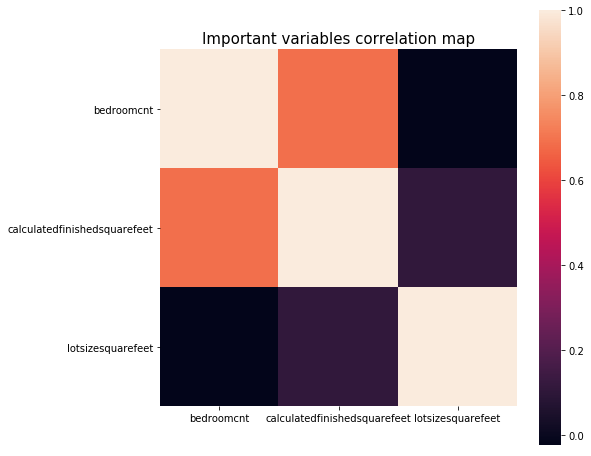

In [41]:
cols_to_use = [col for col in train_data_new.columns if col in ['calculatedfinishedsquarefeet', 'bedroomcnt', 'lotsizesquarefeet']]

# cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_data[cols_to_use]
corrmat = temp_df.corr(method="spearman")
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [42]:
print train_data["lotsizesquarefeet"].mean()
print train_data["lotsizesquarefeet"].median()
print train_data["lotsizesquarefeet"].mode()

29110.1641766
7200.0
0    6000.0
dtype: float64


In [43]:
train_data["lotsizesquarefeet"].fillna(train_data["lotsizesquarefeet"].median(), inplace=True)
print train_data["lotsizesquarefeet"].value_counts()
print train_data["lotsizesquarefeet"].mean()
print train_data["lotsizesquarefeet"].median()
print train_data["lotsizesquarefeet"].mode()

7200.0      10519
6000.0       1145
5000.0        474
7000.0        353
6500.0        300
7500.0        269
6600.0        203
5500.0        173
6300.0        163
4000.0        155
4500.0        151
5200.0        150
5400.0        144
6750.0        138
8000.0        137
7499.0        124
6100.0        122
5100.0        116
8400.0        111
7700.0        110
6250.0        110
1742.0        102
7800.0        101
6200.0        100
3049.0         96
6001.0         96
4800.0         92
5999.0         89
2178.0         86
9000.0         84
            ...  
23259.0         1
10636.0         1
38396.0         1
22682.0         1
36018.0         1
1451.0          1
195296.0        1
18233.0         1
22641.0         1
26729.0         1
9899.0          1
5792.0          1
1656.0          1
13368.0         1
17301.0         1
38768.0         1
22639.0         1
16852.0         1
16376.0         1
18542.0         1
213865.0        1
2309.0          1
24125.0         1
2828.0          1
22635.0   

In [44]:
#removing propertycountylandusecode because it is not in interpretable format
train_data.drop(["propertycountylandusecode"], axis=1, inplace=True)

In [45]:
for column in train_data:
    print column, "\n",train_data[column].value_counts(dropna=False), "\n\n\n********"

parcelid 
11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
14753974    2
12779635    2
11188497    2
10883535    2
10790468    2
10798910    2
14678446    2
12689560    2
10796614    2
14316410    2
11633771    2
12023571    2
14667297    2
14294516    2
12715657    2
14444102    2
14022812    2
12978851    2
14057417    2
11135845    2
11477350    2
11146377    2
11866315    2
11602482    2
14500952    2
           ..
11240334    1
11320206    1
10739089    1
12123282    1
10741142    1
12031384    1
14130585    1
12027290    1
12862962    1
12756350    1
17197466    1
11046267    1
10910830    1
14202253    1
11038055    1
11104576    1
17265761    1
12858732    1
14604356    1
12068206    1
14210190    1
14736753    1
14599538    1
14601587    1
14613877    1
11199862    1
11726199    1
12096888    1
11181433    1
12438686    1
Name: parcelid, Length: 90150, dtype: int64 


********
logerror 
 0.0030    938
 0.0020    915
 0.0050    911
 0.0010    901
 0.0070   

In [46]:
train_data["regionidcity"].interpolate(inplace=True)
train_data["regionidzip"].interpolate(inplace=True)

print train_data["regionidcity"].value_counts(dropna=False)
print train_data["regionidzip"].value_counts(dropna=False)

12447.000000     20667
46298.000000      3002
52650.000000      2133
54311.000000      2128
5534.000000       2037
40227.000000      1952
16764.000000      1800
25218.000000      1586
34278.000000      1386
27110.000000      1268
12773.000000      1223
47019.000000      1189
13150.000000      1121
47568.000000      1097
45457.000000      1052
24812.000000      1038
33252.000000      1034
34543.000000       950
51239.000000       932
54722.000000       929
53571.000000       923
25459.000000       904
24832.000000       891
32380.000000       820
13693.000000       815
37086.000000       791
33612.000000       772
20008.000000       756
21412.000000       729
15554.000000       693
                 ...  
18786.500000         1
37701.000000         1
45877.500000         1
9421.000000          1
18829.000000         1
31116.500000         1
45842.000000         1
31103.000000         1
75249.000000         1
11450.000000         1
18802.500000         1
9397.000000          1
26981.50000

In [47]:
#imputing unitcnt using propertylandusedesc

for i, row in train_data.iterrows():
    if np.isnan(row["unitcnt"]):
        if row["propertylandusetypeid"] in [261, 266, 269]:
            train_data.loc[i, "unitcnt"] = 1
        elif row["propertylandusetypeid"] == 246:
            train_data.loc[i, "unitcnt"] = 2
        elif row["propertylandusetypeid"] == 247:
            train_data.loc[i, "unitcnt"] = 3
        elif row["propertylandusetypeid"] == 248:
            train_data.loc[i, "unitcnt"] = 4
            
train_data["unitcnt"].fillna(1, inplace=True)

train_data["unitcnt"].value_counts(dropna=False)

1.0      86395
2.0       2368
4.0        884
3.0        622
6.0          1
5.0          1
9.0          1
11.0         1
143.0        1
70.0         1
Name: unitcnt, dtype: int64

In [48]:
print train_data["unitcnt"].mean()
print train_data["unitcnt"].median()
print train_data["unitcnt"].mode()


1.07202436998
1.0
0    1.0
dtype: float64


In [49]:
train_data.drop(["numberofstories"], axis=1, inplace=True)

In [50]:
#imputing year built by mean
print train_data["yearbuilt"].mean()
print train_data["yearbuilt"].median()
print train_data["yearbuilt"].mode()

train_data["yearbuilt"].fillna(train_data["yearbuilt"].mean(), inplace=True)

print train_data["yearbuilt"].mean()
print train_data["yearbuilt"].median()
print train_data["yearbuilt"].mode()


1968.53287012
1970.0
0    1955.0
dtype: float64
1968.53287012
1969.0
0    1955.0
dtype: float64


In [51]:
#impute structuretaxvaluedollarcnt, taxvaluedollarcnt, landtaxvaluedollarcnt, taxamount by interpolation

cols_to_interpolate = ["structuretaxvaluedollarcnt", "taxvaluedollarcnt", "landtaxvaluedollarcnt", "taxamount"]

for c in cols_to_interpolate:
    train_data[c].interpolate(inplace=True)

In [52]:
train_data.isnull().sum()

parcelid                        0
logerror                        0
transactiondate                 0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
dtype: int64

In [53]:
train_data.to_csv("/home/jay/Documents/MS/CSE519-2017-111491357/HW2/train_data_mod.csv")

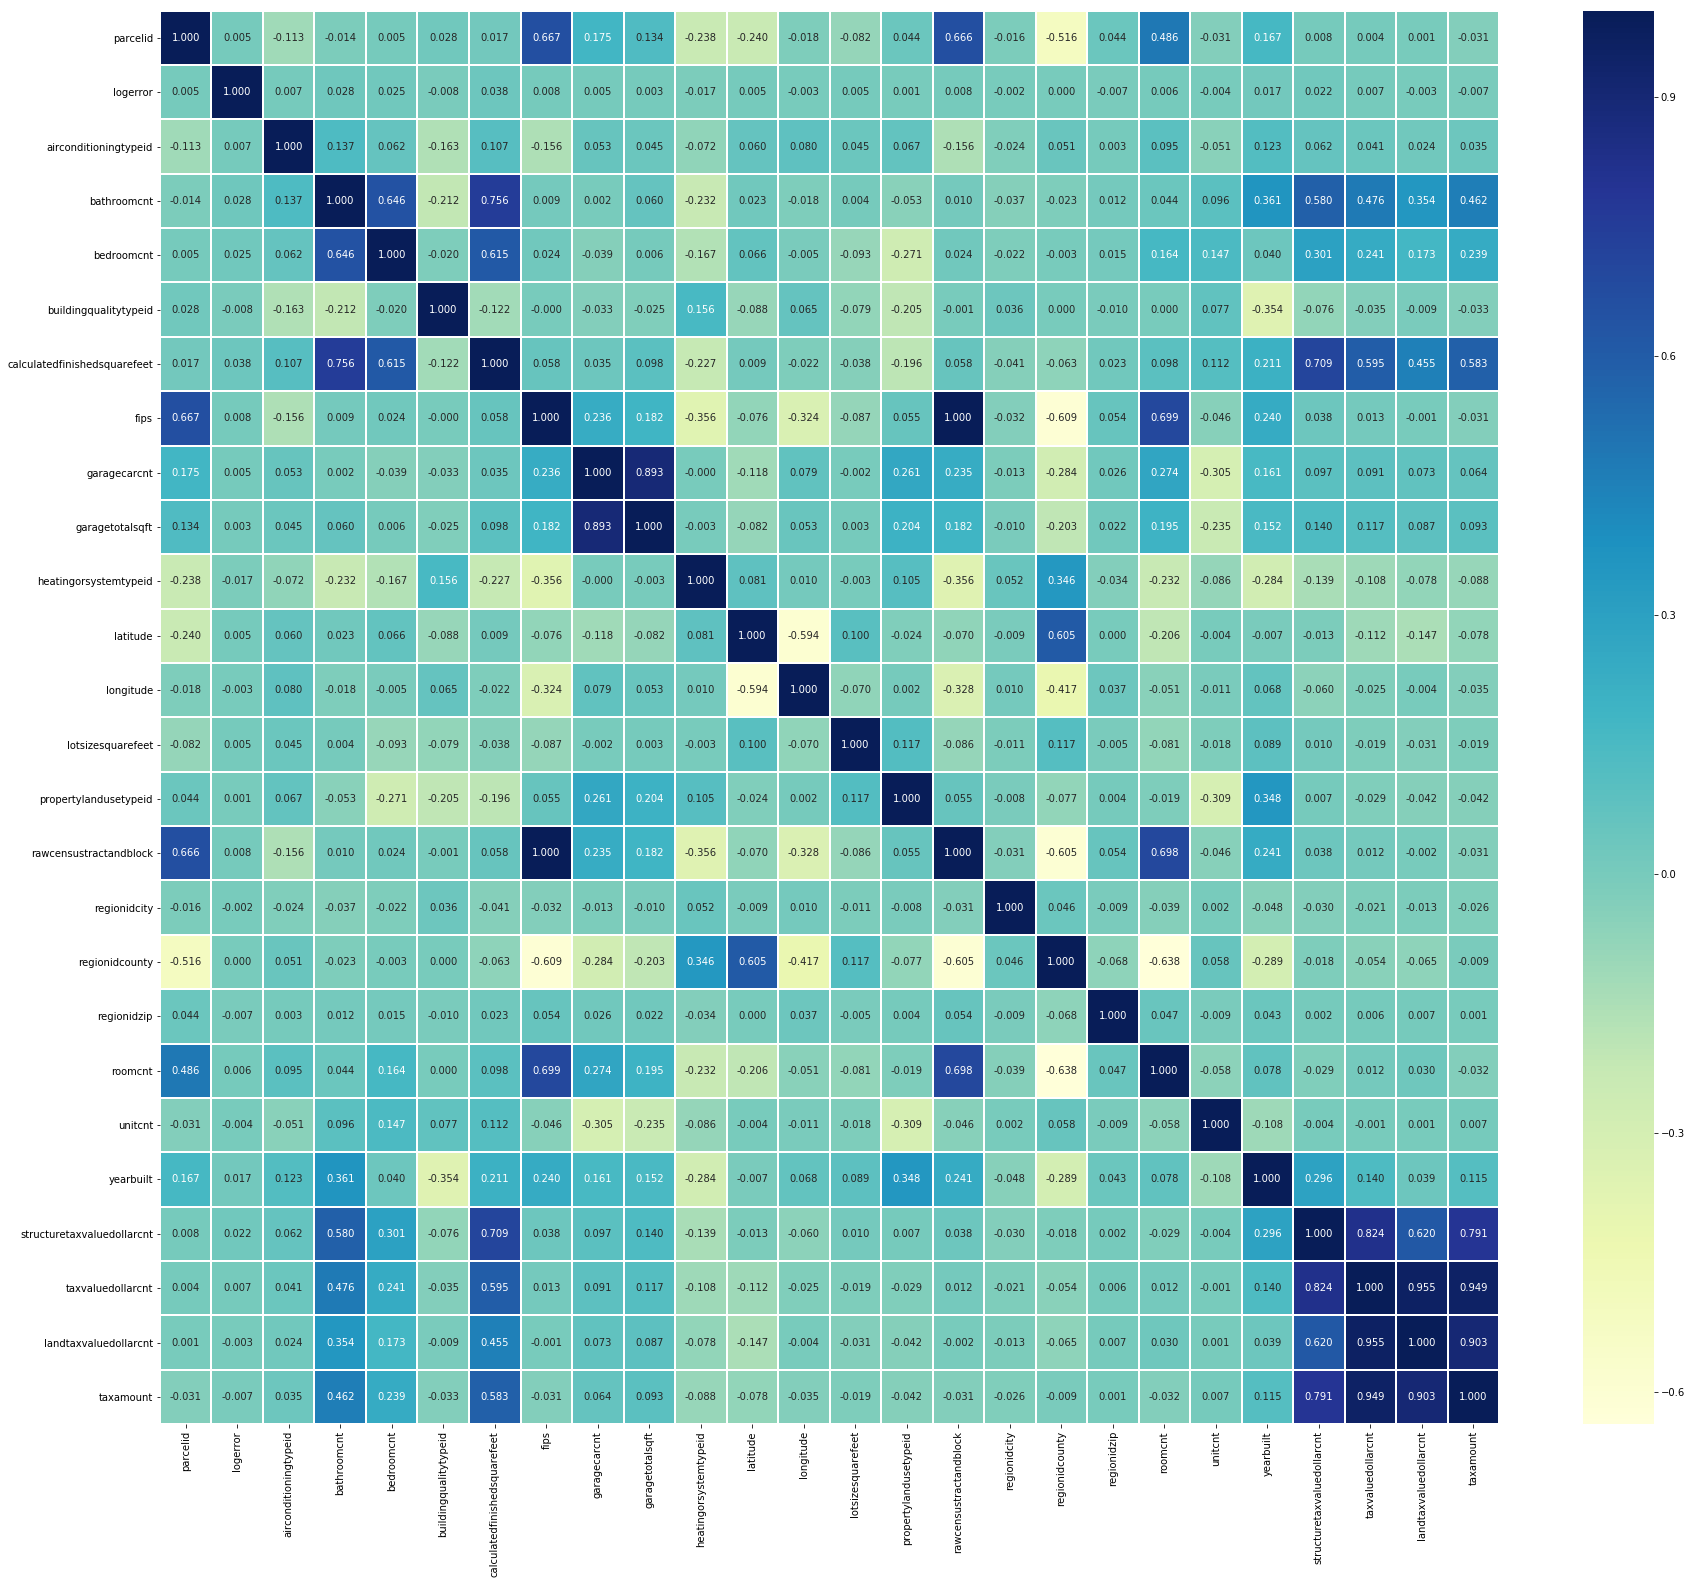

In [54]:
plt.figure(figsize=(30,26))
sb.set_context(font_scale=2.5)
corr_fig = sb.heatmap(train_data.corr("pearson"), cmap="YlGnBu", annot=True, fmt=".3f", linewidths=1.0)

In [55]:
corr_fig = corr_fig.get_figure()
corr_fig.savefig("/home/jay/Documents/MS/CSE519-2017-111491357/HW2/correlation_plot_1.png")

Here we can observe that the tax related variables are highly correlated, which means it is redundant to use all of these for further analysis
Since, 'taxamount' is described as 'The total property tax assessed for that assessment year' it seem like a good option to keep and to discard the other tax variables.

There 3 more pairs of variables that are highly correlated and do not contribute to adding more information.
These pairs are :
1. fips / rawcensustractandblock
2. structuretaxvaluedollarcnt/ landtaxvaluedollarcnt/ taxvaluedollarcnt
3. garagecarcnt / garagetotalsqft

After carefully analysing the data
I decided to drop, rawcensustractandblock, structuretaxvaluedollarcnt, landtaxvaluedollarcnt, garagecarcnt

In [56]:
train_data.drop(["rawcensustractandblock", "structuretaxvaluedollarcnt", "landtaxvaluedollarcnt", "taxvaluedollarcnt", "garagecarcnt"], axis=1, inplace=True)

Lets plot the correlation again

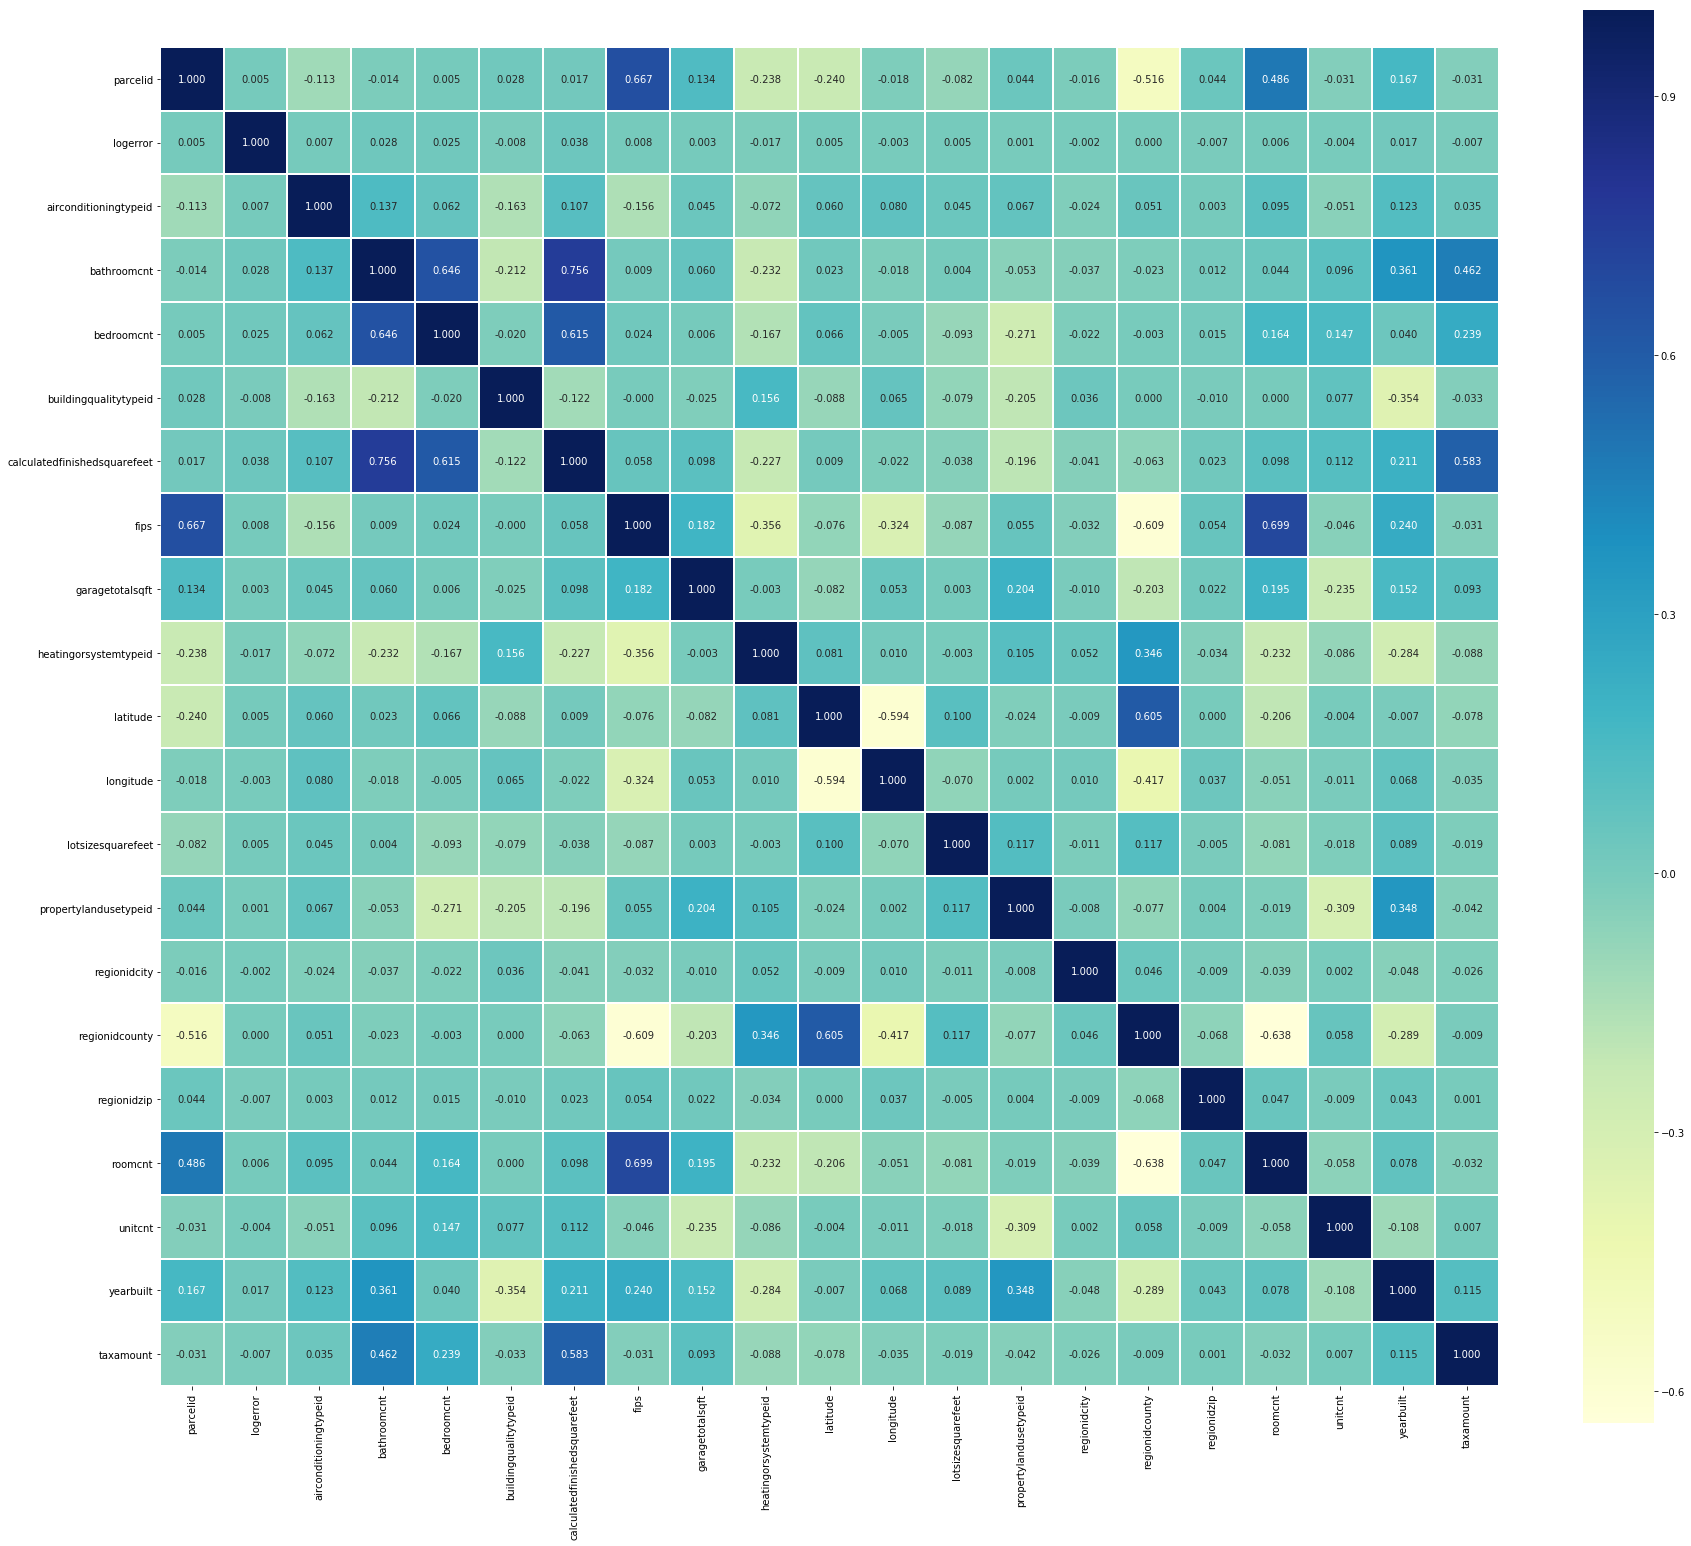

In [57]:
plt.figure(figsize=(30,26))
sb.set_context(font_scale=2.5)
corr_fig = sb.heatmap(train_data.corr("pearson"), cmap="YlGnBu", square=True, annot=True, fmt=".3f", linewidths=1.0)
corr_fig = corr_fig.get_figure()
corr_fig.savefig("/home/jay/Documents/MS/CSE519-2017-111491357/HW2/correlation_plot_2.png")

Let's do a linear regression on the current data

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

cat_cols = ["airconditioningtypeid", "heatingorsystemtypeid", "propertylandusetypeid"]

train_df = train_data.drop(["parcelid", "logerror", "transactiondate"]+cat_cols, axis=1)
target = train_data["logerror"].values

feature_names = train_df.columns.values

print feature_names

X_train, X_test, y_train, y_test = train_test_split( train_df, target, test_size=0.2, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# print y_pred.shape

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# # # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

print('Variance score: % f' % regr.score( X_test, y_test))


['bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid'
 'calculatedfinishedsquarefeet' 'fips' 'garagetotalsqft' 'latitude'
 'longitude' 'lotsizesquarefeet' 'regionidcity' 'regionidcounty'
 'regionidzip' 'roomcnt' 'unitcnt' 'yearbuilt' 'taxamount']
('Coefficients: \n', array([ -4.77274591e-04,  -1.34002233e-04,   3.12012140e-04,
         1.20888378e-05,   2.21716874e-04,  -2.40808814e-06,
        -5.44818860e-09,   5.86460124e-09,   8.47424798e-09,
        -1.27855179e-08,   6.11868083e-06,  -4.36215955e-07,
        -1.34555811e-04,  -1.95247994e-03,   6.28396155e-05,
        -1.10763357e-06]))
Mean squared error: 0.03
Variance score:  0.002549
